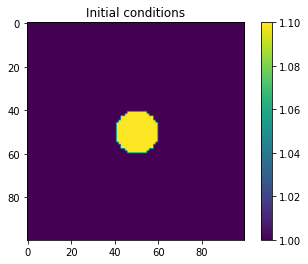

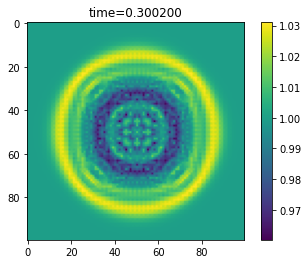

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [1]:
from numpy import *
from pylab import figure, imshow, title, colorbar
import matplotlib.pyplot as plt


box_size = 1.


# Initial Conditions
n = 100
u = zeros((n,n)) # velocity in x direction
v = zeros((n,n)) # velocity in y direction

eta = ones((n,n)) # pressure deviation (like height)
x,y = mgrid[:n,:n]
droplet_x, droplet_y = 50, 50
rr = (x-droplet_x)**2 + (y-droplet_y)**2
eta[rr<10**2] = 1.1 # add a perturbation in pressure surface

grid_spacing =  1.0*box_size / n
g = 1.

dt = grid_spacing / 100.

def spatial_derivative(A, axis=0):
    """
    Compute derivative of array A using balanced finite differences
    Axis specifies direction of spatial derivative (d/dx or d/dy)

    dA[i] =  A[i+1] - A[i-1]   / 2
    ... or with grid spacing included ...
    dA[i]/dx =  A[i+1] - A[i-1]   / 2dx

    Used By:
        d_dx
        d_dy
    """
    return (roll(A, -1, axis) - roll(A, 1, axis)) / (grid_spacing*2.)

def d_dx(A):
    return spatial_derivative(A,1)
def d_dy(A):
    return spatial_derivative(A,0)


def d_dt(eta, u, v, g, b=0):
    """
    http://en.wikipedia.org/wiki/Shallow_water_equations#Non-conservative_form
    """
    for x in [eta, u, v]: # type check
        assert isinstance(x, ndarray) and not isinstance(x, matrix)

    du_dt = -g*d_dx(eta) - b*u
    dv_dt = -g*d_dy(eta) - b*v

    H = 0#eta.mean() - our definition of eta includes this term
    deta_dt = -d_dx(u * (H+eta)) - d_dy(v * (H+eta))

    return deta_dt, du_dt, dv_dt


def evolveEuler(eta, u, v, g, dt=dt):
    """
    Evolve state (eta, u, v, g) forward in time using simple Euler method
    x_{n+1} = x_{n} +   dx/dt * d_t

    Returns an generator / infinite list of all states in the evolution

    >>> trajectory = evolveEuler(eta, u, v, g)
    >>> eta, u, v, time = trajectory.next()
    >>> eta, u, v, time = trajectory.next()
    >>> imshow(eta)
    """
    time = 0
    yield eta, u, v, time # return initial conditions as first state in sequence

    while(True):
        deta_dt, du_dt, dv_dt = d_dt(eta, u, v, g)

        eta = eta + deta_dt * dt
        u = u + du_dt * dt
        v = v + dv_dt * dt
        time += dt
        yield eta, u, v, time

def demo(eta=eta, u=u, v=v, g=g, dt=dt, endTime=.3):
    trajectory = evolveEuler(eta, u, v, g, dt)

    # Figure with initial conditions
    eta, u, v, time = trajectory.__next__()
    figure(); title('Initial conditions')
    imshow(eta); colorbar()

    # Burn some time
    time = 0
    while(time < endTime):
        _, _, _, time = trajectory.__next__()

    # Figure after some time has passed
    eta, u, v, time = trajectory.__next__()
    figure(); title('time=%f'%time)
    plt.imshow(eta); colorbar()
    plt.show()
    print(eta)
    print(d_dx(eta))
    print(d_dy(eta))
    

#=========================================
# Unused but possibly relevant code
#=========================================

def d_dt_conservative(eta, u, v, g):
    """
    http://en.wikipedia.org/wiki/Shallow_water_equations#Conservative_form
    """
    for x in [eta, u, v]: # type check
        assert isinstance(x, ndarray) and not isinstance(x, matrix)

    deta_dt = -d_dx(eta*u) -d_dy(eta*v)
    du_dt = (deta_dt*u - d_dx(eta*u**2 + 1./2*g*eta**2) - d_dy(eta*u*v)) / eta
    dv_dt = (deta_dt*v - d_dx(eta*u*v) - d_dy(eta*v**2 + 1./2*g*eta**2)) / eta

    return deta_dt, du_dt, dv_dt

demo()


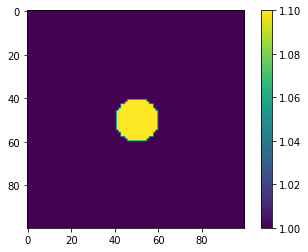

In [3]:
plt.imshow(eta)
colorbar()
plt.show()